![](.img/LOGO.png)

## Test Code

Hello again, during this workshop we will be using **Python**, running on a **Jupyter-notebook** environment. Many of you may be already familiar with this programing languate, however we will test if we have all the required dependecies installed. 

This is an example using the libraries we will be using in this workshop. A brief explanation of all of them will be found bellow if you wish to learn a little bit more of them later. However for this activity we will just `Run All` functions to check that our **VM** is ready to go. 

## The code includes the following libraries:

**matplotlib:** A versatile plotting library for creating static, animated, and interactive visualizations in Python.

**numpy:** A powerful library for numerical operations, providing support for large, multi-dimensional arrays and matrices.

**pandas:** A data manipulation and analysis library, offering data structures like DataFrame for efficient data handling.

**ipympl:** A library for interactive Matplotlib plots in Jupyter notebooks.

**scipy:** A library for scientific computing that builds on NumPy and provides additional functionality, such as statistical routines.

**os:** A module for interacting with the operating system, allowing tasks like file and directory manipulation.

**struct:** Facilitates the packing and unpacking of binary data in Python. It is crucial for working with C-style data structures and binary file formats, offering functions like pack and unpack for efficient data conversion.

**time:**  This module provides essential time-related functionality in Python. It includes functions like time() for obtaining the current time, sleep() for introducing delays, and process_time() for measuring CPU time.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from ipywidgets import interact
import ipympl
import struct
import time
import fixedpoint

## Overview of the Code:
Setting up Interactive Plotting with ipympl:

`%matplotlib widget` enables interactive Matplotlib plots in Jupyter notebooks using ipympl.
Generating Random Data and Plotting:

Random data is generated using NumPy (`np.random.randn`) and plotted as a histogram with a fitted normal distribution curve.

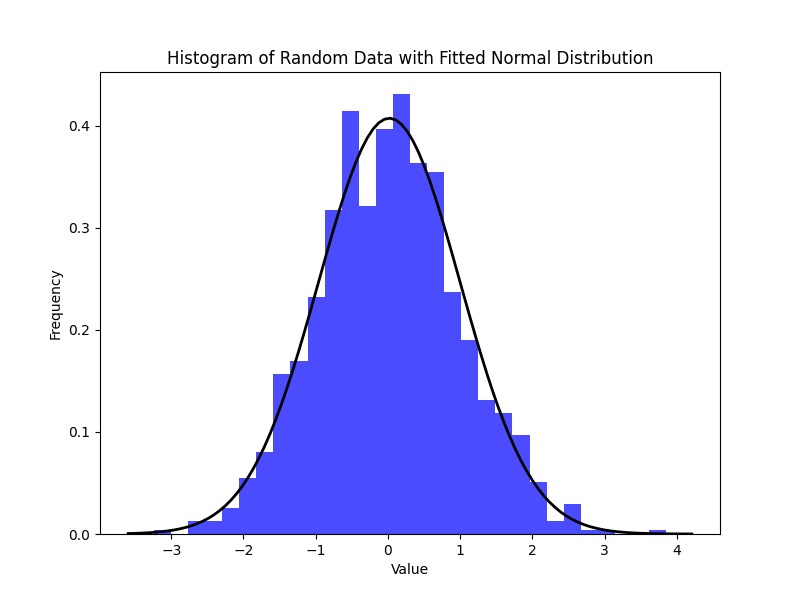

In [2]:
# Set up matplotlib to work with Jupyter notebooks using ipympl
%matplotlib widget

# Generate random data
np.random.seed(42)
data = np.random.randn(1000)

# Plot a histogram using matplotlib
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.7, color='blue')

# Fit a normal distribution to the data using scipy
mu, std = norm.fit(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and a title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Random Data with Fitted Normal Distribution')

# Show the plot interactively
plt.show()

### NumPy Operations:

Basic statistical operations (mean and standard deviation) are performed on the generated data using NumPy.

In [3]:
# Perform basic operations with NumPy
mean_value = np.mean(data)
std_deviation = np.std(data)

print("\nNumPy Operations:")
print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_deviation}")


NumPy Operations:
Mean: 0.01933205582232549
Standard Deviation: 0.9787262077473543


### Creating a Pandas DataFrame:

The random data is converted into a Pandas DataFrame, which is a tabular data structure, suitable for various data manipulation tasks.
Displaying DataFrame Information:

The first few rows of the DataFrame are displayed to provide insight into the data structure.
Saving DataFrame to CSV:

The DataFrame is saved to a CSV file using the to_csv method.
Checking File Existence with os:

The existence of the saved CSV file is verified using the os.path.exists function.

In [4]:
# Create a Pandas DataFrame from the random data
df = pd.DataFrame({'Values': data})

# Display the first few rows of the DataFrame
print("\nDataFrame Head:")
print(df.head())

# Save the DataFrame to a CSV file
csv_file_path = 'random_data.csv'
df.to_csv(csv_file_path, index=False)
print(f"\nDataFrame saved to CSV file: {csv_file_path}")

# Check if the CSV file exists using os
if os.path.exists(csv_file_path):
    print(f"\n{csv_file_path} exists.")
else:
    print(f"\n{csv_file_path} does not exist.")


DataFrame Head:
     Values
0  0.496714
1 -0.138264
2  0.647689
3  1.523030
4 -0.234153

DataFrame saved to CSV file: random_data.csv

random_data.csv exists.


The `struct.pack` function is used to pack data into a binary format. The format string '**Id5s**' specifies the data types and sizes to be packed (`I` for unsigned int, `d` for double, and `5s` for a string of length 5).

In a similar way, the `struct.unpack` function is used to unpack data from binary format, It uses the same string format to *unpack* the information into something we can understand.

If all of this seems confusing, don't worry, we will explain a little bit of this in a future lab session.

In [5]:
# Example data to pack
data_to_pack = (42, 3.14, b'Hello')
print("The data to pack is:\n",data_to_pack)

start_time = time.time()
# Pack the data using struct
packed_data = struct.pack('Id5s', *data_to_pack)
print("Packed data looks like this:\n", packed_data)

# Unpack the data using struct
unpacked_data = struct.unpack('Id5s', packed_data)
print("Unpackage data looks like this:\n", unpacked_data)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The total pack and unpack process took: {elapsed_time:.6f} seconds")


The data to pack is:
 (42, 3.14, b'Hello')
Packed data looks like this:
 b'*\x00\x00\x00\x00\x00\x00\x00\x1f\x85\xebQ\xb8\x1e\t@Hello'
Unpackage data looks like this:
 (42, 3.14, b'Hello')
The total pack and unpack process took: 0.000144 seconds
